# Spherical 3R Robot Example

This example demonstrates a symbolic model of a 3-joint RRR (revolute-revolute-revolute) spherical robot arm,
commonly used to teach kinematic chains with spatial motion.

We will:
- Define time-dependent symbolic joint angles
- Use standard DH parameters
- Compute forward kinematics
- Visualize the end-effector pose


In [1]:
import sys
sys.path.append("../src")  # or the relative path to your src folder
from sympy import symbols, Function, pi
from base_robot import RobotModel
from dh_parameters import DHParams
from kinematics import compute_forward_kinematics, get_end_effector_pose

t = symbols('t')


In [2]:
# Define time-dependent joint angles
theta1 = Function('theta1')(t)
theta2 = Function('theta2')(t)
theta3 = Function('theta3')(t)

# Link lengths and offsets
a1 = 0
a2 = 1
a3 = 1
d1 = 1

# DH Table (standard convention):
# Joint  a     alpha     d         theta
dh1 = DHParams(a=a1, alpha=pi/2, d=d1, theta=theta1)
dh2 = DHParams(a=a2, alpha=0,    d=0,  theta=theta2)
dh3 = DHParams(a=a3, alpha=0,    d=0,  theta=theta3)

dh_params = [dh1, dh2, dh3]


In [3]:
robot = RobotModel(
    n_joints=3,
    time_var=t,
    dh_params=dh_params
)

robot.describe()


Robot with 3 joints.
  Joint 1: a=0, alpha=pi/2, d=1, theta=theta1(t)
  Joint 2: a=1, alpha=0, d=0, theta=theta2(t)
  Joint 3: a=1, alpha=0, d=0, theta=theta3(t)


In [4]:
T_all = compute_forward_kinematics(robot)
T_end = get_end_effector_pose(robot)
T_end


Matrix([
[-sin(theta2(t))*sin(theta3(t))*cos(theta1(t)) + cos(theta1(t))*cos(theta2(t))*cos(theta3(t)), -sin(theta2(t))*cos(theta1(t))*cos(theta3(t)) - sin(theta3(t))*cos(theta1(t))*cos(theta2(t)),  sin(theta1(t)), -sin(theta2(t))*sin(theta3(t))*cos(theta1(t)) + cos(theta1(t))*cos(theta2(t))*cos(theta3(t)) + cos(theta1(t))*cos(theta2(t))],
[-sin(theta1(t))*sin(theta2(t))*sin(theta3(t)) + sin(theta1(t))*cos(theta2(t))*cos(theta3(t)), -sin(theta1(t))*sin(theta2(t))*cos(theta3(t)) - sin(theta1(t))*sin(theta3(t))*cos(theta2(t)), -cos(theta1(t)), -sin(theta1(t))*sin(theta2(t))*sin(theta3(t)) + sin(theta1(t))*cos(theta2(t))*cos(theta3(t)) + sin(theta1(t))*cos(theta2(t))],
[                               sin(theta2(t))*cos(theta3(t)) + sin(theta3(t))*cos(theta2(t)),                               -sin(theta2(t))*sin(theta3(t)) + cos(theta2(t))*cos(theta3(t)),               0,                                           sin(theta2(t))*cos(theta3(t)) + sin(theta2(t)) + sin(theta3(t))*cos(theta2(t)

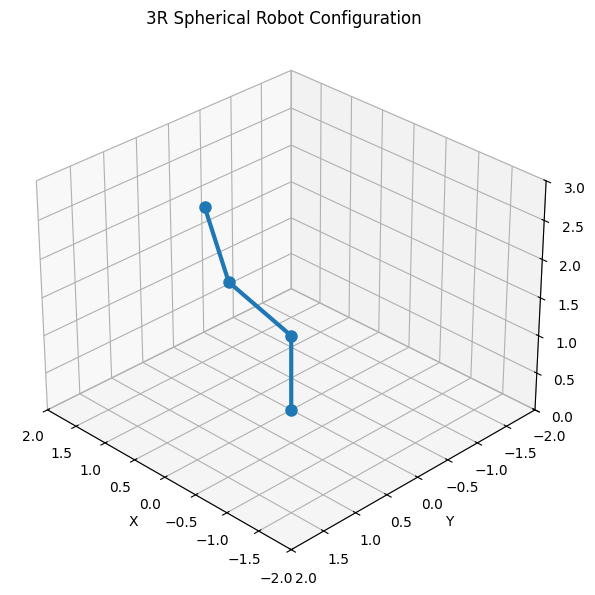

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Use specific joint values for visualization
theta1_val = np.pi / 4
theta2_val = np.pi / 4
theta3_val = np.pi / 6

# Substitute joint values into symbolic transformations
T1 = T_all[0].subs({theta1: theta1_val})
T2 = T_all[1].subs({theta1: theta1_val, theta2: theta2_val})
T3 = T_all[2].subs({theta1: theta1_val, theta2: theta2_val, theta3: theta3_val})

# Extract joint positions
O0 = np.array([0, 0, 0])
O1 = np.array([T1[0, 3], T1[1, 3], T1[2, 3]]).astype(np.float64)
O2 = np.array([T2[0, 3], T2[1, 3], T2[2, 3]]).astype(np.float64)
O3 = np.array([T3[0, 3], T3[1, 3], T3[2, 3]]).astype(np.float64)

# Stack positions for plotting
X = [O0[0], O1[0], O2[0], O3[0]]
Y = [O0[1], O1[1], O2[1], O3[1]]
Z = [O0[2], O1[2], O2[2], O3[2]]

# Plot in 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(X, Y, Z, '-o', linewidth=3, markersize=8)

ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([0, 3])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title("3R Spherical Robot Configuration")
ax.view_init(elev=30, azim=135)
plt.tight_layout()
plt.show()
